# **Sales Forecasting and Optimization Project**

## **Project Overview**
The aim of this project is to predict future sales for a retail or e-commerce business using historical sales data. By leveraging advanced data analysis and machine learning techniques, we aim to build a model that can generate accurate sales predictions. This will help businesses make data-driven decisions to optimize inventory, marketing, and sales strategies.

## **Project Steps**
1. **Data Collection and Cleaning:** Gather and clean historical sales data to ensure it is ready for analysis.
2. **Data Exploration:** Analyze the data to uncover patterns, trends, and key insights that may impact sales.
3. **Model Development:** Build a  regression model for sales forecasting.
4. **Model Optimization:** Tune the model to improve accuracy and reduce prediction errors.




| **Column Name**              | **Description**                                                                 |
|------------------------------|---------------------------------------------------------------------------------|
| `Item_Identifier`            | Unique identifier for each item in the dataset.                                 |
| `Item_Weight`                | Weight of the item.                                                             |
| `Item_Fat_Content`           | Indicates whether the item is low-fat or regular-fat.                           |
| `Item_Visibility`            | The percentage of total display area allocated to the item in the store.        |
| `Item_Type`                  | Category of the item (e.g., Dairy, Soft Drinks, Meats).                         |
| `Item_MRP`                   | Maximum Retail Price (MRP) of the item.                                         |
| `Outlet_Identifier`          | Unique identifier for each outlet/store.                                        |
| `Outlet_Establishment_Year`  | Year when the outlet/store was established.                                     |
| `Outlet_Size`                | Size of the outlet (e.g., Small, Medium, Large).                                |
| `Outlet_Location_Type`       | The type of location for the store (e.g., Urban, Suburban, Rural).              |
| `Outlet_Type`                | Type of outlet (e.g., Grocery Store, Supermarket Type 1, Supermarket Type 2).   |
| `Item_Outlet_Sales`          | Total sales of the item in the particular outlet.                               |


### Importing libiraries

In [429]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [430]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV ,train_test_split 
from sklearn.preprocessing import LabelEncoder , OneHotEncoder 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold

## **Data Collection and Cleaning**

In [431]:
# Reading Data 
df = pd.read_csv(r"C:\Users\mokha\Desktop\Big mart sales prediction\Train.csv")

In [432]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [433]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [434]:
df.shape

(8523, 12)

In [435]:
# Checking  data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [436]:
#checking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [437]:
df["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [438]:
df.shape

(8523, 12)

In [439]:
percentage_for_null_Outlet_Size = (2410 / 8523) *100
percentage_for_null_Outlet_Size

28.27642848762173

###### drop Outlet_Size for 28.2% null values and categorical column(if fill with mode it will make bias for mode value) 

In [440]:
#drop Item_Identifier and Outlet_Identifier
df.drop(["Outlet_Identifier","Item_Identifier","Outlet_Size"] ,axis=1 , inplace=True)


In [441]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,994.7052


In [442]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


In [443]:
# check dublicated duplicates
df[df.duplicated()]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [444]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,994.7052


In [445]:
#seperate num and cat values
cat_features = df.select_dtypes(include="O").columns
num_features = df.select_dtypes(exclude="O").columns

In [446]:
# check correctness of the cat values
for col in cat_features:
    print()
    print("\n",col)
    print(df[col].unique(),"\n")
    



 Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 



 Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 



 Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2'] 



 Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 



In [447]:
# fix Item_Fat_Content values
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({'low fat': "Low Fat", 'LF': "Low Fat", 'reg': "Regular", 'regular': "Regular"})


In [448]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [449]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [450]:
# fill nan with Knn imputer

imputer = KNNImputer(n_neighbors=3)
df["Item_Weight"] = imputer.fit_transform(df[["Item_Weight"]])

In [451]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [452]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,994.7052


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


### **Data Exploration** 

In [454]:
num_features

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

### Checking columns distributions

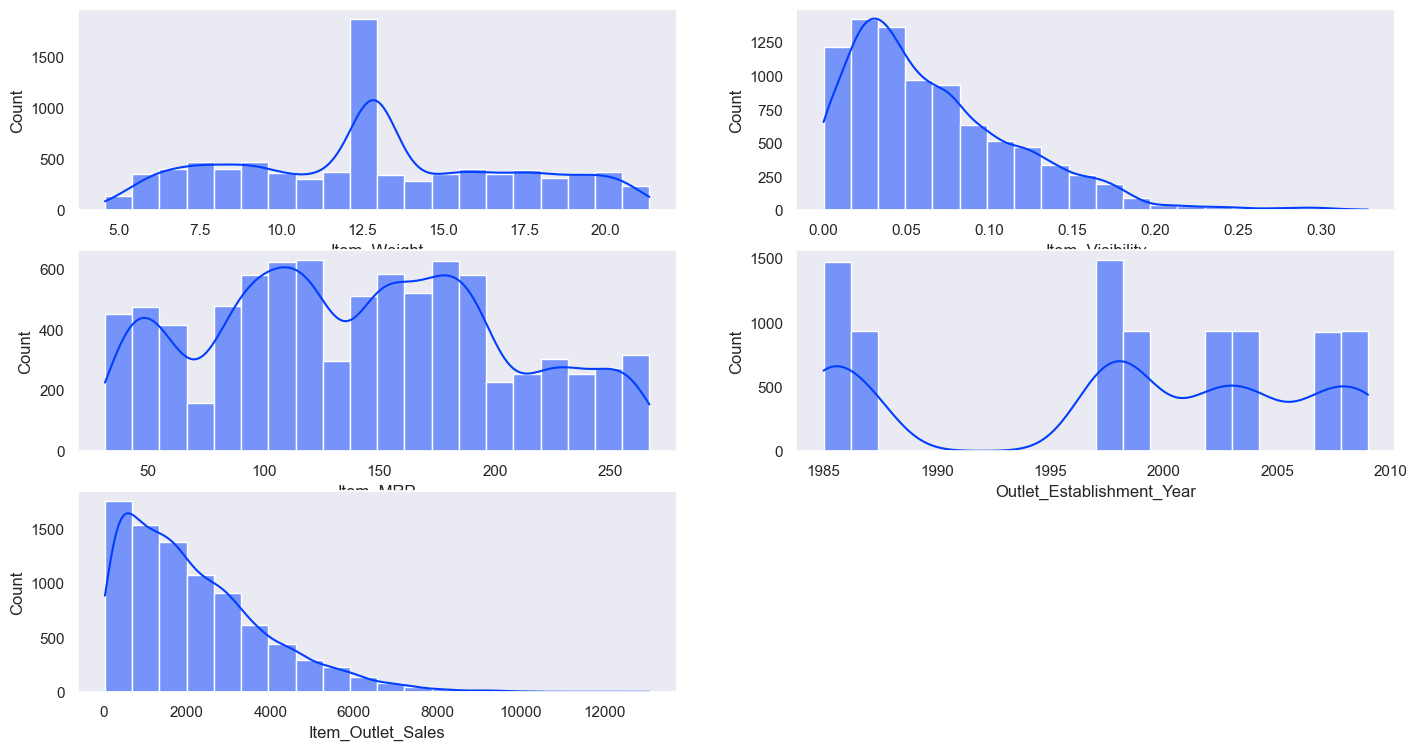

In [455]:
plt.figure(figsize=(17,12))
for i,col in enumerate(num_features):
    plt.subplot(4,2,1+i)
    sns.histplot(df[col], bins=20,kde=True)

### Observation 
#### Item_outlet_sales & Item visibility is left_skew and others is not have pattern

### Checking Outliers

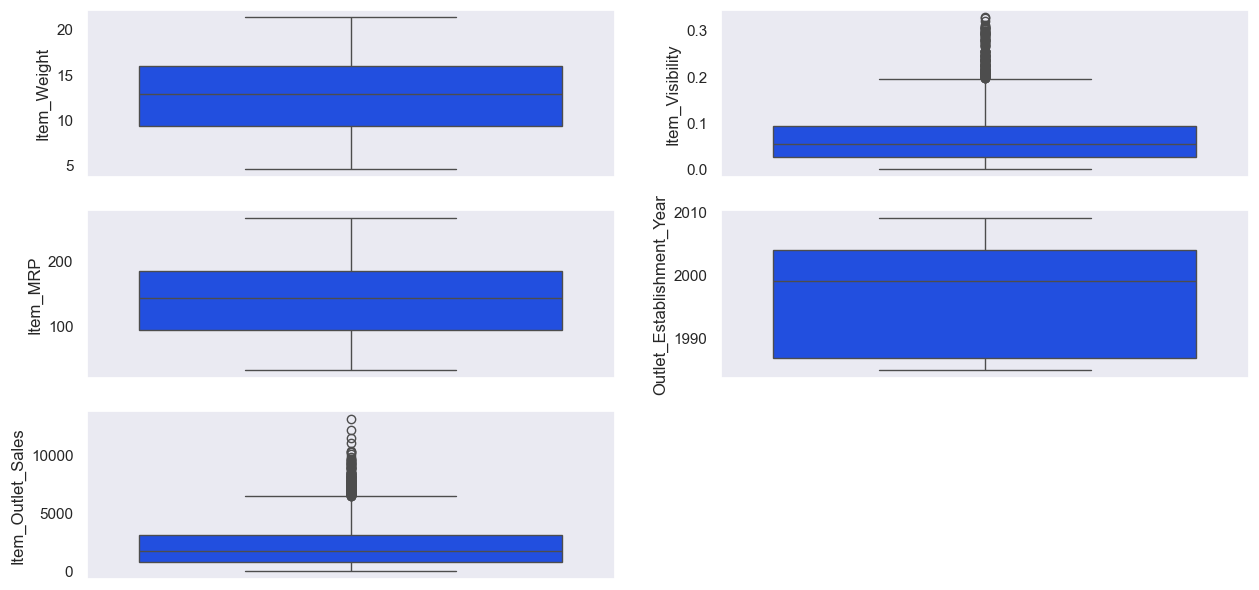

In [456]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_features):
    plt.subplot(4,2,1+i)
    sns.boxplot(df[col])

### Observation 
#### Item_outlet_sales & Item visibility is left_skew have outliers

### Checking Columns relation between each others

<Axes: >

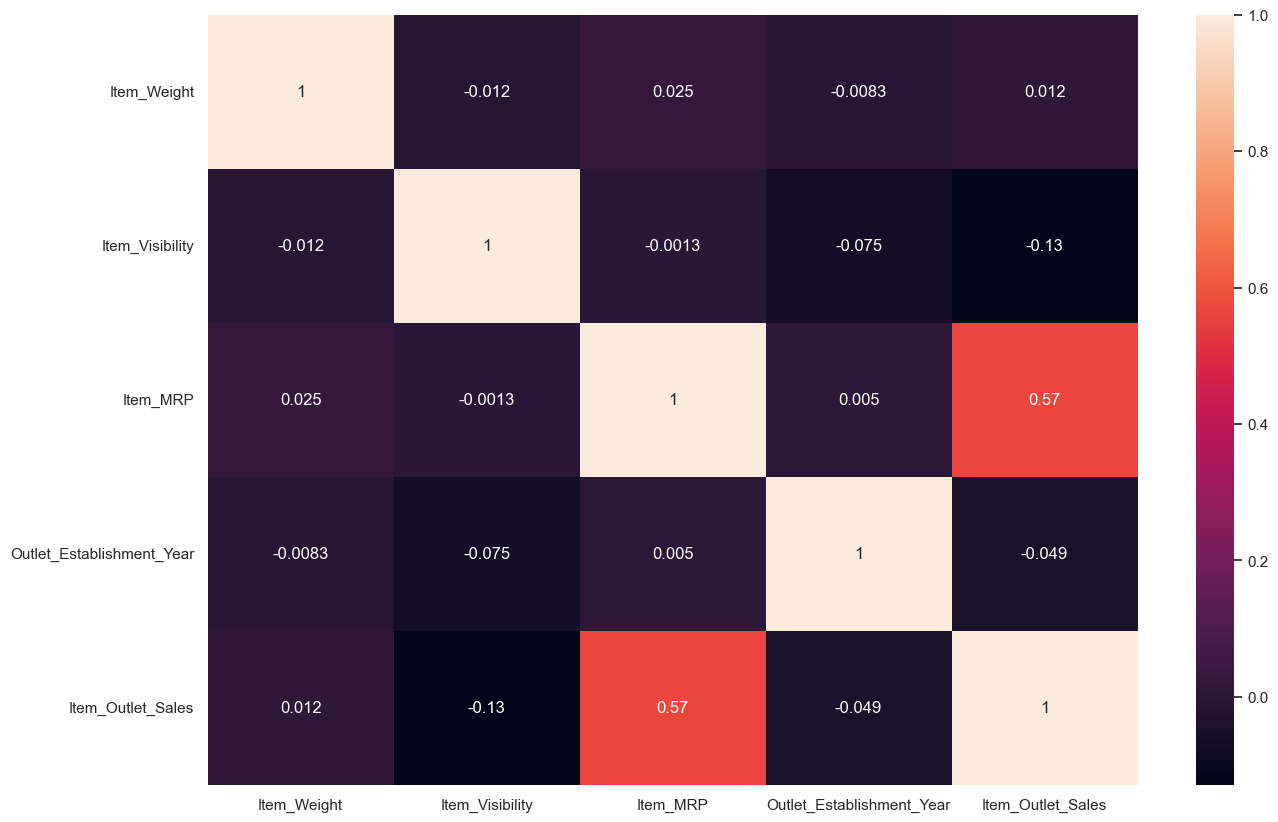

In [457]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num_features].corr(),annot=True)

### Observation 
#### No Strong relations

In [458]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [459]:
#normal outlier
Q1 = df['Item_Visibility'].quantile(0.25)
Q3 = df['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Item_Visibility_outliers = df[(df['Item_Visibility'] < lower_bound) | (df['Item_Visibility'] > upper_bound)]
Item_Visibility_outliers.head() 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,12.857645,Regular,0.255395,Dairy,196.8794,1985,Tier 1,Grocery Store,780.3176
83,12.857645,Low Fat,0.293418,Household,194.6136,1985,Tier 1,Grocery Store,583.2408
108,12.857645,Low Fat,0.278974,Soft Drinks,225.3720,1985,Tier 1,Grocery Store,679.1160
174,17.700000,Low Fat,0.291865,Fruits and Vegetables,115.1834,1998,Tier 3,Grocery Store,345.5502
334,12.857645,Low Fat,0.204700,Frozen Foods,76.8670,1985,Tier 1,Grocery Store,229.7010


In [460]:
Item_Visibility_outliers.shape

(144, 9)

In [461]:

Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Item_Outlet_Sales_outliers = df[(df['Item_Outlet_Sales'] < lower_bound) | (df['Item_Outlet_Sales'] > upper_bound)]
Item_Outlet_Sales_outliers.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,21.350000,Low Fat,0.069103,Canned,259.9278,2009,Tier 3,Supermarket Type2,6768.5228
130,12.857645,Low Fat,0.033810,Canned,180.5976,1985,Tier 3,Supermarket Type3,7968.2944
132,12.857645,Low Fat,0.144338,Health and Hygiene,224.4404,1985,Tier 3,Supermarket Type3,6976.2524
145,18.600000,Low Fat,0.039356,Frozen Foods,246.3802,1999,Tier 1,Supermarket Type1,7370.4060
203,12.857645,Low Fat,0.078362,Baking Goods,177.9370,1985,Tier 3,Supermarket Type3,6704.6060


### Observation
#### normal outlier values

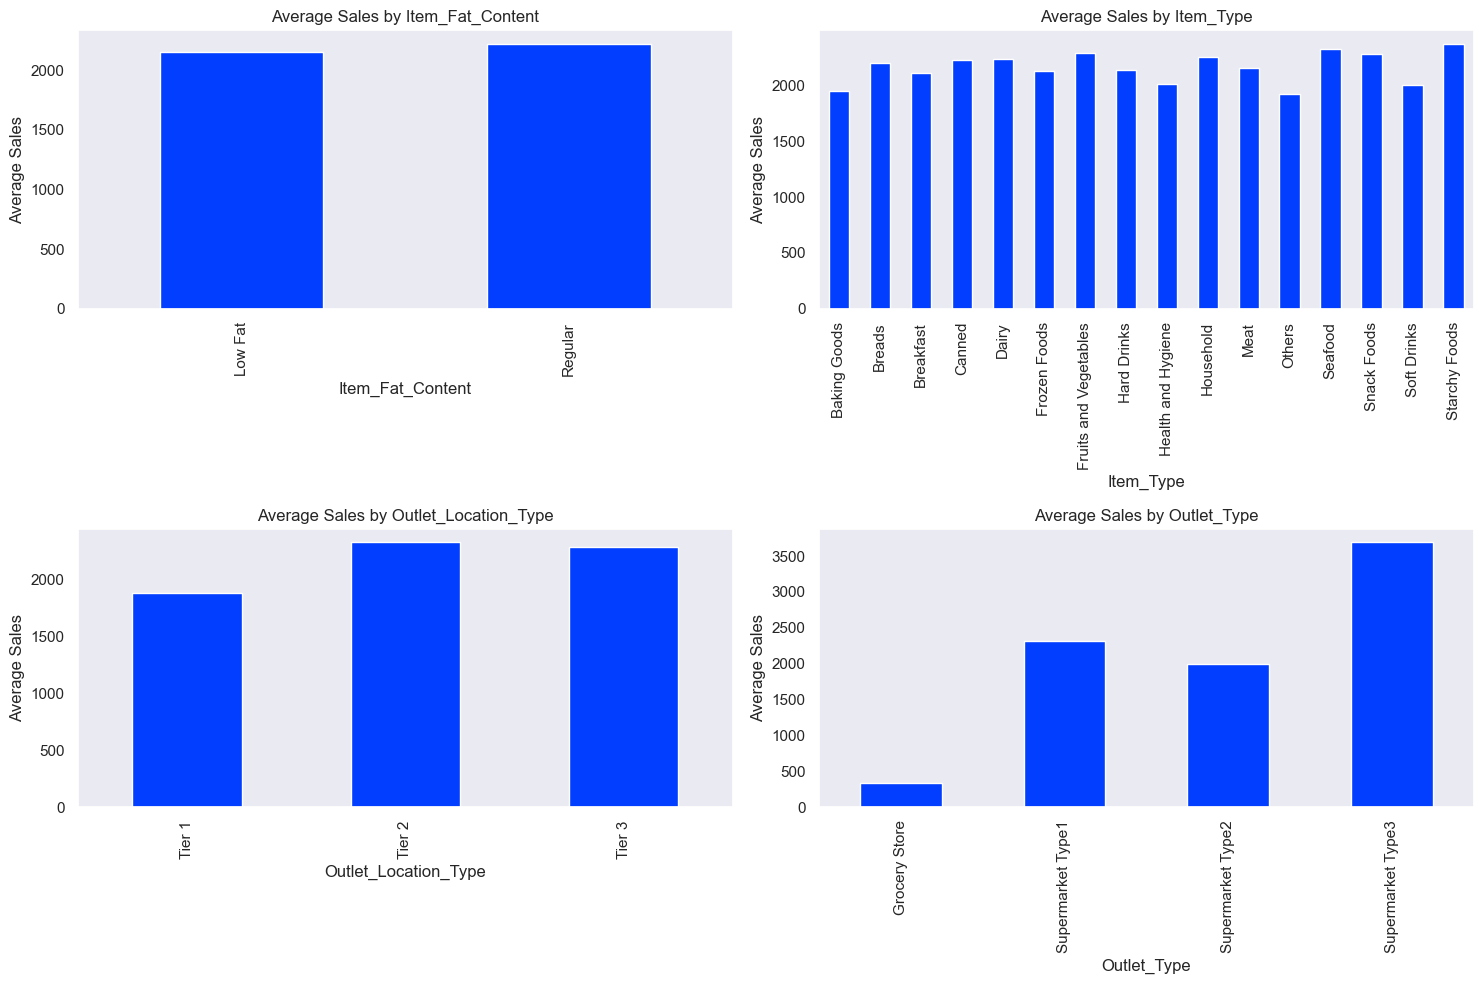

In [462]:

plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_features):
    plt.subplot(2, 2, 1 + i)
    
    sales_avg = df.groupby(col)['Item_Outlet_Sales'].mean()
    
    sales_avg.plot(kind='bar')
    
    plt.title(f'Average Sales by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Sales')

plt.tight_layout()
plt.show()


### Observation 
#### The Fat Content doesn't effect on the Item_Outlet_Sales , outlet_location and item_type doesn't strongly affect on the Item_Outlet_Sales and outlet_type strongly affects on the Item_Outlet_Sales.

In [463]:
# make label encoder to the Item_Type because a lot of items with no orders
encoder = LabelEncoder()
df["Item_Type"] = encoder.fit_transform(df["Item_Type"])

In [464]:
# select others to one hot encoder
cat_features_without_Item_Type = [item for item in cat_features if item != "Item_Type"]

In [465]:
print(cat_features_without_Item_Type)

['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type']


In [466]:
num_features

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [467]:
# OneHotEncoder on other cat value
list_ = [("ohe",OneHotEncoder(drop="first"),cat_features_without_Item_Type)]
ct = ColumnTransformer(list_,remainder="passthrough")
ohe_df = pd.DataFrame(ct.fit_transform(df[cat_features_without_Item_Type]),columns=ct.get_feature_names_out())
df = df.join(ohe_df)

In [468]:
df.drop(cat_features_without_Item_Type,inplace=True,axis=1)

In [469]:
df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,ohe__Item_Fat_Content_Regular,ohe__Outlet_Location_Type_Tier 2,ohe__Outlet_Location_Type_Tier 3,ohe__Outlet_Type_Supermarket Type1,ohe__Outlet_Type_Supermarket Type2,ohe__Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,249.8092,1999,3735.1380,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,0.019278,14,48.2692,2009,443.4228,1.0,0.0,1.0,0.0,1.0,0.0
2,17.50,0.016760,10,141.6180,1999,2097.2700,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,0.000000,6,182.0950,1998,732.3800,1.0,0.0,1.0,0.0,0.0,0.0
4,8.93,0.000000,9,53.8614,1987,994.7052,0.0,0.0,1.0,1.0,0.0,0.0


In [470]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'ohe__Item_Fat_Content_Regular', 'ohe__Outlet_Location_Type_Tier 2',
       'ohe__Outlet_Location_Type_Tier 3',
       'ohe__Outlet_Type_Supermarket Type1',
       'ohe__Outlet_Type_Supermarket Type2',
       'ohe__Outlet_Type_Supermarket Type3'],
      dtype='object')

In [471]:
df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,ohe__Item_Fat_Content_Regular,ohe__Outlet_Location_Type_Tier 2,ohe__Outlet_Location_Type_Tier 3,ohe__Outlet_Type_Supermarket Type1,ohe__Outlet_Type_Supermarket Type2,ohe__Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,249.8092,1999,3735.1380,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,0.019278,14,48.2692,2009,443.4228,1.0,0.0,1.0,0.0,1.0,0.0
2,17.50,0.016760,10,141.6180,1999,2097.2700,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,0.000000,6,182.0950,1998,732.3800,1.0,0.0,1.0,0.0,0.0,0.0
4,8.93,0.000000,9,53.8614,1987,994.7052,0.0,0.0,1.0,1.0,0.0,0.0


### Preparing for modeling

In [472]:

X = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

In [473]:

X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=.3,shuffle=True,random_state=42)

In [474]:
len(df.columns)

12

In [475]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'ohe__Item_Fat_Content_Regular', 'ohe__Outlet_Location_Type_Tier 2',
       'ohe__Outlet_Location_Type_Tier 3',
       'ohe__Outlet_Type_Supermarket Type1',
       'ohe__Outlet_Type_Supermarket Type2',
       'ohe__Outlet_Type_Supermarket Type3'],
      dtype='object')

In [476]:
#choosing num features in X features (to avoid choosing y)
X_num_features = [feature for feature in num_features if feature != "Item_Outlet_Sales"]

In [477]:
print(X_num_features)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [478]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'ohe__Item_Fat_Content_Regular', 'ohe__Outlet_Location_Type_Tier 2',
       'ohe__Outlet_Location_Type_Tier 3',
       'ohe__Outlet_Type_Supermarket Type1',
       'ohe__Outlet_Type_Supermarket Type2',
       'ohe__Outlet_Type_Supermarket Type3'],
      dtype='object')

In [479]:
X_train

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,ohe__Item_Fat_Content_Regular,ohe__Outlet_Location_Type_Tier 2,ohe__Outlet_Location_Type_Tier 3,ohe__Outlet_Type_Supermarket Type1,ohe__Outlet_Type_Supermarket Type2,ohe__Outlet_Type_Supermarket Type3
1921,7.720000,0.147904,6,116.6466,1998,1.0,0.0,1.0,0.0,0.0,0.0
655,19.750000,0.014301,9,103.0332,1997,0.0,0.0,0.0,1.0,0.0,0.0
2229,12.857645,0.054221,1,129.1310,1985,1.0,0.0,1.0,0.0,0.0,1.0
2537,19.350000,0.118342,13,222.6088,2002,0.0,1.0,0.0,1.0,0.0,0.0
3528,18.350000,0.092150,5,184.8266,1987,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5734,9.395000,0.286345,6,139.1838,1998,1.0,0.0,1.0,0.0,0.0,0.0
5191,15.600000,0.117575,5,75.6670,2007,0.0,1.0,0.0,1.0,0.0,0.0
5390,17.600000,0.018944,8,237.3590,2002,0.0,1.0,0.0,1.0,0.0,0.0
860,20.350000,0.054363,13,117.9466,2007,0.0,1.0,0.0,1.0,0.0,0.0


##### Note: I don't scale the data because the best models that i have tried don't need 

#### Feature selection with VarianceThreshold

In [480]:
# feature selection with VarianceThreshold
selector = VarianceThreshold(threshold=0.2)  
X_new = selector.fit_transform(X)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)
X_train=X_train[selected_features]
X_test=X_test[selected_features]

Selected Features: Index(['Item_Weight', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year',
       'ohe__Item_Fat_Content_Regular', 'ohe__Outlet_Location_Type_Tier 2',
       'ohe__Outlet_Location_Type_Tier 3',
       'ohe__Outlet_Type_Supermarket Type1'],
      dtype='object')


## **Model Development**

In [481]:

regression_algorithms = {
    "AdaBoostRegressor" : AdaBoostRegressor(),
    "Random Forest Regression": RandomForestRegressor(max_depth=3),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "XGBRegressor" : XGBRegressor(),
}

In [482]:

def eval_metrics(y , y_test): 
    print("mae :",mean_absolute_error(y,y_test))
    print("mse :",mean_squared_error(y,y_test))
    print("r2 :",r2_score(y,y_test))

In [483]:
for name , model in regression_algorithms.items():
    print("*"*50)
    print(name)
    print()
    model_train = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Train\n")
    eval_metrics(y_train,y_train_pred)
    print("\nTest\n")
    eval_metrics(y_test,y_pred)

**************************************************
AdaBoostRegressor

Train

mae : 1035.1727464423243
mse : 1845207.9328337256
r2 : 0.37607820101051626

Test

mae : 1024.6011326423627
mse : 1820567.5845875165
r2 : 0.350027921591625
**************************************************
Random Forest Regression

Train

mae : 1028.6448242928702
mse : 1950656.8191348533
r2 : 0.340422675325994

Test

mae : 1006.2199071435645
mse : 1861710.203536551
r2 : 0.335339341076485
**************************************************
Gradient Boosting Regression

Train

mae : 752.6514854276746
mse : 1097758.380873458
r2 : 0.6288139826070922

Test

mae : 758.2304831109403
mse : 1139687.9715335874
r2 : 0.5931129578127994
**************************************************
XGBRegressor

Train

mae : 478.3163971898818
mse : 443952.1983651434
r2 : 0.8498860484281927

Test

mae : 824.3926485144194
mse : 1393652.480880742
r2 : 0.5024435196772561


#### Best model in Gradient Boast

## **Model Optimization**

In [484]:
# HyperParameter tuning for optimization
gb_model = GradientBoostingRegressor()

param_distributions = {
    "loss" : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.1],  
    'max_depth': [3, 5, 7], 
    "criterion" : ['friedman_mse', 'squared_error'],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, ], 
    'min_samples_leaf': [1, 2]
}

grid_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_distributions, cv=5, n_jobs=-1, scoring='neg_mean_squared_error',random_state=42)
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Train\n")
eval_metrics(y_train,y_train_pred)
print("\nTest\n")
eval_metrics(y_test,y_pred)


C:\Users\mokha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'loss': 'huber', 'learning_rate': 0.1, 'criterion': 'squared_error'}
Train

mae : 478.3163971898818
mse : 443952.1983651434
r2 : 0.8498860484281927

Test

mae : 754.4577940052441
mse : 1178102.667356054
r2 : 0.5793982899825407


#### Default is better

#### Choose the model with best accuracy with no overfitting

In [485]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
y_train_pred = gb_model.predict(X_train)
print("Train\n")
eval_metrics(y_train,y_train_pred)
print("\nTest\n")
eval_metrics(y_test,y_pred)


Train

mae : 752.6514854276746
mse : 1097758.380873458
r2 : 0.6288139826070921

Test

mae : 758.0683206227944
mse : 1139572.3107206451
r2 : 0.5931542505940259
